# MAT245 Lab 2

# Markov Chain

In [4]:
import numpy as np

n = 3
m = 3

P_unscaled = np.random.rand(n, m)
row_sums = P_unscaled.sum(axis = 1).reshape(3,1)
P = P_unscaled / row_sums


X_0 = np.array([0.0, 1.0, 0.0])
X_5 = X_0.dot(np.linalg.matrix_power(P, 5))
X_7 = X_0.dot(np.linalg.matrix_power(P, 7))
print X_5
print X_7


[ 0.46091253  0.33116175  0.20792572]
[ 0.46116047  0.33093573  0.2079038 ]


# 2D Norms

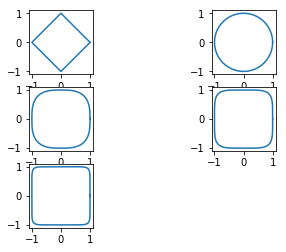

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def pwr(n, p):
  return n ** p

def p_norm(point, p):
  return abs(pwr (abs(pwr(point[0], float(p))) + abs(pwr(point[1], float(p))),  1.0/float(p)))

def compare_by_x(x, y):
  if x[0] < y[0]:
    return 1
  elif x[0] > y[0]:
    return -1
  else: 
    return 0

def saparateForPlotting(datapoints, p):
  # scaling
  P = P_unscaled / np.array( map( lambda list : p_norm(list, p),  P_unscaled )).reshape(m, 1)
  P_Top = filter(lambda x : x[1] > 0, P)
  P_Down = filter(lambda x : x[1] < 0, P)
  P_Top = sorted(P_Top, compare_by_x)
  P_Down = sorted(P_Down, compare_by_x, reverse = True)
  P = P_Top + P_Down
  Ptranspose = np.transpose(P)
  return Ptranspose.copy()

#number of sampling
m = 1000
#sample in a square around origin
P_unscaled = np.random.rand(m, 2) - 0.5


p_norms = [1, 2, 3, 5, 10]

plt.figure(1)

for i in p_norms:
  j = p_norms.index(i)
  plt.subplot(321 + j)
  P = saparateForPlotting(P_unscaled, i)
  plt.plot(P[0], P[1])
  plt.gca().set_aspect('equal', adjustable='box')


plt.show()


# Lab 3

# SVD

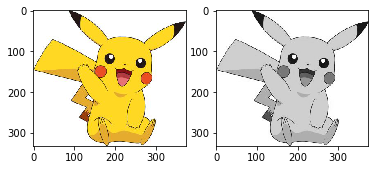

In [20]:
import scipy as sp
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
coloredImg = sp.misc.imread("pikachu.jpg")
grayImg = sp.misc.imread("pikachu.jpg", flatten = True)

plt.figure(1)
plt.subplot(121)
plt.imshow(coloredImg)
plt.subplot(122)
plt.imshow(grayImg, cmap='gray') # have to add this to get the gray scale

# Part 1, Cree plot

(333L, 333L)
(374L, 374L)


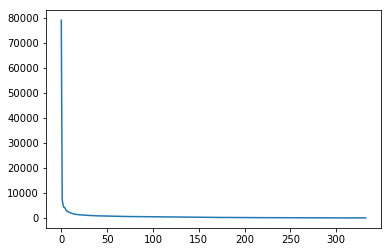

[2 0]


In [44]:
U, s, V = np.linalg.svd(grayImg)
S = np.diag(s)
x = np.array(range(len(s)))
print U.shape
print V.shape



plt.figure(2)
plt.plot(x, s)
plt.show()
print np.array([2,3])*np.array([1,0])

# Part 2, Low Rank Approx

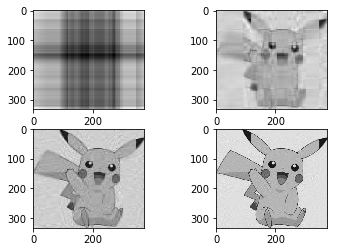

In [74]:
 def getLowerImg(img, r):
    U, s, V = np.linalg.svd(img)
    n = V.shape[0]
    m = U.shape[0]
    less = min(n, m)
    onesAndZeros = np.hstack((np.ones(r),np.zeros(less -r)))
    s = s * onesAndZeros
    S = np.diag(s)
    if m > n: 
        S = np.vstack(((S, np.zeros(m-n, n))))
    elif n > m:
        S = np.hstack((S, np.zeros((m, n-m))))
    
    ret = U.dot(S).dot(V)
    return ret


levels = [1, 10, 25, 100]
for i in levels:
  j = levels.index(i)
  plt.subplot(221 + j)
  plt.imshow(getLowerImg(grayImg, i), cmap = "gray")


0 :  0.0344196929719


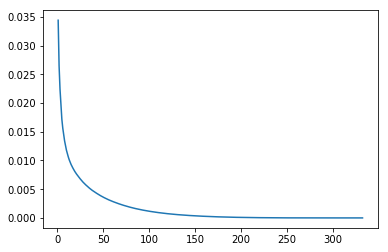

In [103]:
def getError(_s, _r):
    s_2 = _s * _s
    onesZeros = np.hstack((np.ones(_r), np.zeros(_s.shape[0] - _r)))
    return np.sum(s_2 * onesZeros) / np.sum(s_2) 
U, s, V = np.linalg.svd(grayImg)
r = 100
getError(s, r)

x = range(1, len(s))
y = [1-getError(s, i) for i in x]

for i in range(0, 10):
    if y[i] < 0.05:
        print i, ": " ,y[i]
        break

plt.plot(x, y)
